# Práctica 2:

In [1]:
#cargamos librerías necesarias para manipular dataframes y para visualizar resultados.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Cargamos datos desde un fichero en la web con estructura CSV (Comma Separated Values)
#El fichero no contiene cabeceras
#Nos aseguramos de retirar el primer espacio en blanco que viene en cada columna.
#Este paso puede ser considerado como una primera transformación
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None,skipinitialspace=True)

#definimos las cabeceras
df.columns = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hour-per-week","native-country","income"]

#Mostramos los primeros registros
df.head ()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
df.shape

(32561, 15)

Existen 32.561 registros y 15 columnas

In [7]:
#muestra el tipo de dato que hay en cada columna
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hour-per-week      int64
native-country    object
income            object
dtype: object

Al hacer la carga ha hecho una autodetección del tipo de dato pero es posible que no sea la mejor selección por lo que a continuación nos aseguraremos que el tipo de dato sea correcto, especialmente si queremos hacer transformaciones.

In [15]:
#cambiamos los tipos de datos en las columnas para asegurarnos que será correctos

df = df.astype({"age": int})
df = df.astype({"workclass": str})
df = df.astype({"fnlwgt": int})
df = df.astype({"education": str})
df = df.astype({"education-num": int})
df = df.astype({"marital-status": str})
df = df.astype({"occupation": str})
df = df.astype({"relationship": str})
df = df.astype({"race": str})
df = df.astype({"sex": str})
df = df.astype({"capital-gain": int})
df = df.astype({"capital-loss": int})
df = df.astype({"hour-per-week": int})
df = df.astype({"native-country": str})
df = df.astype({"income": str})

#muestra el tipo de dato que hay en cada columna, después de definirlo mejor
df.dtypes


age                int32
workclass         object
fnlwgt             int32
education         object
education-num      int32
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int32
capital-loss       int32
hour-per-week      int32
native-country    object
income            object
dtype: object

Podemos ver que el tipo de entero disminuyó a 32 bits, en lugar de 64 (que era demasiado)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int32
workclass         32561 non-null object
fnlwgt            32561 non-null int32
education         32561 non-null object
education-num     32561 non-null int32
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int32
capital-loss      32561 non-null int32
hour-per-week     32561 non-null int32
native-country    32561 non-null object
income            32561 non-null object
dtypes: int32(6), object(9)
memory usage: 3.0+ MB


Vemos más información del dataframe y observamos que en las columnas al parecer no hay datos nulos.

In [18]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Hacemos un análisis de los datos numéricos y observamos que en el caso de capital-gain y capital-loss, casi todos los datos son cero, tal vez debamos tomar decisiones, si el algoritmo que vamos a aplicar, por ejemplo, es de predicción, puede ser que este dato no sea tan relevante o bien, afecte negativamente las predicciones.

In [19]:
df.isnull().values.any()

False

Nos aseguramos que las columnas no contengan valores nulos, en caso positivo se podrían aplicar reglas de conversión, pero para este dataset so serán necesarias.

In [20]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hour-per-week        0
native-country     583
income               0
dtype: int64

Con este paso detectamos valores desconocidos, al elaborar el dataset, se nombraron a estos elementos como '?', podemos tomar la decisión de cambiarlo por 'Unknown' o bien poner un valor nulo, depende qué queramos hacer posteriormente, como este dataframe potencialmente lo utilizaremos para hacer predicciones de salario, lo mejor será cambiar el tipo de dato '?' por 'Unknown', será más claro de entender.

In [21]:
#reemplaza '?' por 'Unknown'
df = df.replace('?', 'Unknown')

In [22]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Hacemos un análisis rápido y observamos que en la variable income (la posible variable a predecir) hay bastantes más personas con salario por debajo de 50K USD que con salario por encima.

## Visualización de datos

Para poder aplicar limpieza en los datos, es importante, primeramente entenderlos para ver las acciones a realizar, una gran ayuda es poder visualizarlos.

In [24]:
#aplicamos la librería de visualización
import seaborn as sns

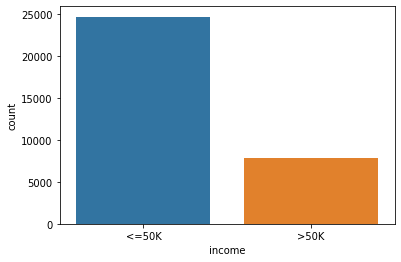

In [25]:
sns.countplot(x='income', data = df)

Podemos visualizar que hay más personas con salario bajo que con salario alto.

### Exporta el fichero a CSV

In [14]:
#reemplazar <path> por la ruta a donde se desea exportar el fichero
df.to_csv('C:/Users/CIS Corporate/Downloads/adult_data_clean.csv', encoding='utf-8')